# Bangkit Final Project: TomaTreat

# Import Dataset

In [ ]:
# Download Dataset
!chmod 600 kaggle.json && (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle) && cp kaggle.json ~/.kaggle/ && echo 'Done'
!kaggle datasets download -d jarvis705/tomato-leaf-disease

Done
 94% 304M/322M [00:01<00:00, 212MB/s]
100% 322M/322M [00:01<00:00, 204MB/s]


In [ ]:
# Unzip Folder
from zipfile import ZipFile

filename = "tomato-leaf-disease.zip"

with ZipFile(filename, 'r') as zip:
  zip.extractall()
  print('Done!')

Done!


# Libraries

In [ ]:
# Data Preparation
import os
import shutil
import numpy as np
from shutil import copyfile
from keras.preprocessing.image import ImageDataGenerator

# Visualization Lib
import cv2
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import datetime, os

# Model Development
import tensorflow as tf
from keras.models import Sequential
from keras.models import Model
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from keras import optimizers, losses, activations, models
from keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Concatenate
from keras import applications

# Prediction Image Lib
from keras.preprocessing import image
from google.colab import files
from tensorflow.keras.applications.xception import preprocess_input

# Report Metrics
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Data Preparation

In [ ]:
!rm -rf '/content/TomatoLeafDiseases'

In [ ]:
classes=['Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___Late_blight', 
         'Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite',
         'Tomato___Target_Spot','Tomato___Tomato_Yellow_Leaf_Curl_Virus','Tomato___Tomato_mosaic_virus','Tomato___healthy']
root = '/content/Tomato Leaf Diseases/'

os.makedirs(root+'Testing Set')
try:
    for i in classes:
        os.makedirs(root+'Testing Set/'+i+'/')
        os.makedirs(root+'New Validation Set/'+i+'/')
except OSError:
    print('error')
    pass

In [ ]:
def split_data(SOURCE, NEW_VALIDATION, TESTING, SPLIT_SIZE):
    allFileNames = os.listdir(SOURCE)
    np.random.shuffle(allFileNames)
    new_validation_filenames, testing_fileNames = np.split(np.array(allFileNames), [int(len(allFileNames)*SPLIT_SIZE)])
    
    new_validation_filenames = [SOURCE+name for name in new_validation_filenames.tolist()]
    testing_fileNames = [SOURCE+name for name in testing_fileNames.tolist()]
    
    for name in new_validation_filenames:
      a = os.path.basename(name)
      if not os.path.exists(os.path.join(NEW_VALIDATION, a)):
        shutil.copy(name, NEW_VALIDATION)
      else:
        base, extension = os.path.splitext(a)
        i = 1
        while os.path.exists(os.path.join(NEW_VALIDATION, '{}_{}{}'.format(base, i, extension))):
            i += 1
        shutil.copy(name, os.path.join(NEW_VALIDATION, '{}_{}{}'.format(base, i, extension)))

    for name in testing_fileNames:
      a = os.path.basename(name)
      if not os.path.exists(os.path.join(TESTING, a)):
        shutil.copy(name, TESTING)
      else:
        base, extension = os.path.splitext(a)
        i = 1
        while os.path.exists(os.path.join(TESTING, '{}_{}{}'.format(base, i, extension))):
            i += 1
        shutil.copy(name, os.path.join(TESTING, '{}_{}{}'.format(base, i, extension)))

new_validation_dir = '/content/Tomato Leaf Diseases/New Validation Set'
validation_dir = '/content/Tomato Leaf Diseases/Validation Set'
testing_dir = '/content/Tomato Leaf Diseases/Testing Set'

validation_tomato_bacterial_dir = os.path.join(validation_dir, 'Tomato___Bacterial_spot/')
new_validation_tomato_bacterial_dir = os.path.join(new_validation_dir,'Tomato___Bacterial_spot/')
testing_tomato_bacterial_dir = os.path.join(testing_dir,'Tomato___Bacterial_spot/')

validation_tomato_early_blight_dir = os.path.join(validation_dir, 'Tomato___Early_blight/')
new_validation_tomato_early_blight_dir = os.path.join(new_validation_dir,'Tomato___Early_blight/')
testing_tomato_early_blight_dir = os.path.join(testing_dir,'Tomato___Early_blight/')

validation_tomato_late_blight_dir = os.path.join(validation_dir, 'Tomato___Late_blight/')
new_validation_tomato_late_blight_dir = os.path.join(new_validation_dir,'Tomato___Late_blight/')
testing_tomato_late_blight_dir = os.path.join(testing_dir,'Tomato___Late_blight/')

validation_tomato_leaf_mold_dir = os.path.join(validation_dir, 'Tomato___Leaf_Mold/')
new_validation_tomato_leaf_mold_dir = os.path.join(new_validation_dir,'Tomato___Leaf_Mold/')
testing_tomato_leaf_mold_dir = os.path.join(testing_dir,'Tomato___Leaf_Mold/')

validation_tomato_septoria_leaf_spot_dir = os.path.join(validation_dir, 'Tomato___Septoria_leaf_spot/')
new_validation_tomato_septoria_leaf_spot_dir = os.path.join(new_validation_dir,'Tomato___Septoria_leaf_spot/')
testing_tomato_septoria_leaf_spot_dir = os.path.join(testing_dir,'Tomato___Septoria_leaf_spot/')

validation_tomato_spider_mites_dir = os.path.join(validation_dir, 'Tomato___Spider_mites Two-spotted_spider_mite/')
new_validation_tomato_spider_mites_dir = os.path.join(new_validation_dir,'Tomato___Spider_mites Two-spotted_spider_mite/')
testing_tomato_spider_mites_dir = os.path.join(testing_dir,'Tomato___Spider_mites Two-spotted_spider_mite/')

validation_tomato_target_spot_dir = os.path.join(validation_dir, 'Tomato___Target_Spot/')
new_validation_tomato_target_spot_dir = os.path.join(new_validation_dir,'Tomato___Target_Spot/')
testing_tomato_target_spot_dir = os.path.join(testing_dir,'Tomato___Target_Spot/')

validation_tomato_yellow_leaf_dir = os.path.join(validation_dir, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus/')
new_validation_tomato_yellow_leaf_dir = os.path.join(new_validation_dir,'Tomato___Tomato_Yellow_Leaf_Curl_Virus/')
testing_tomato_yellow_leaf_dir = os.path.join(testing_dir,'Tomato___Tomato_Yellow_Leaf_Curl_Virus/')

validation_tomato_mosaic_virus_dir = os.path.join(validation_dir, 'Tomato___Tomato_mosaic_virus/')
new_validation_tomato_mosaic_virus_dir = os.path.join(new_validation_dir,'Tomato___Tomato_mosaic_virus/')
testing_tomato_mosaic_virus_dir = os.path.join(testing_dir,'Tomato___Tomato_mosaic_virus/')

validation_tomato_healthy_dir = os.path.join(validation_dir, 'Tomato___healthy/')
new_validation_tomato_healthy_dir = os.path.join(new_validation_dir,'Tomato___healthy/')
testing_tomato_healthy_dir = os.path.join(testing_dir,'Tomato___healthy/')

split_size = .572
split_data(validation_tomato_bacterial_dir, new_validation_tomato_bacterial_dir, testing_tomato_bacterial_dir, split_size)
split_data(validation_tomato_early_blight_dir, new_validation_tomato_early_blight_dir, testing_tomato_early_blight_dir, split_size)
split_data(validation_tomato_late_blight_dir, new_validation_tomato_late_blight_dir, testing_tomato_late_blight_dir, split_size)
split_data(validation_tomato_leaf_mold_dir, new_validation_tomato_leaf_mold_dir, testing_tomato_leaf_mold_dir, split_size)
split_data(validation_tomato_septoria_leaf_spot_dir, new_validation_tomato_septoria_leaf_spot_dir, testing_tomato_septoria_leaf_spot_dir, split_size)
split_data(validation_tomato_spider_mites_dir, new_validation_tomato_spider_mites_dir, testing_tomato_spider_mites_dir, split_size)
split_data(validation_tomato_target_spot_dir, new_validation_tomato_target_spot_dir, testing_tomato_target_spot_dir, split_size)
split_data(validation_tomato_yellow_leaf_dir, new_validation_tomato_yellow_leaf_dir, testing_tomato_yellow_leaf_dir, split_size)
split_data(validation_tomato_mosaic_virus_dir, new_validation_tomato_mosaic_virus_dir , testing_tomato_mosaic_virus_dir , split_size)
split_data(validation_tomato_healthy_dir, new_validation_tomato_healthy_dir , testing_tomato_healthy_dir , split_size)

In [ ]:
train_dir = '/content/Tomato Leaf Diseases/Training Set'
new_validation_dir = '/content/Tomato Leaf Diseases/New Validation Set'
testing_dir = '/content/Tomato Leaf Diseases/Testing Set'

# TRAIN 
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    shuffle=True,
                                                    seed=42,
                                                    target_size=(224,224),
                                                    class_mode='categorical')

# VALIDATION
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(new_validation_dir,
                                                              shuffle=False,
                                                              seed=42,
                                                              target_size=(224,224),
                                                              class_mode='categorical')

# TESTING
testing_datagen = ImageDataGenerator(rescale=1.0/255)

testing_generator = testing_datagen.flow_from_directory(testing_dir,
                                                        shuffle=False,
                                                        seed=42,
                                                        target_size=(224,224),
                                                        class_mode='categorical')

Found 10000 images belonging to 10 classes.
Found 4000 images belonging to 10 classes.
Found 3000 images belonging to 10 classes.


# Visualize Data

<Figure size 432x288 with 0 Axes>

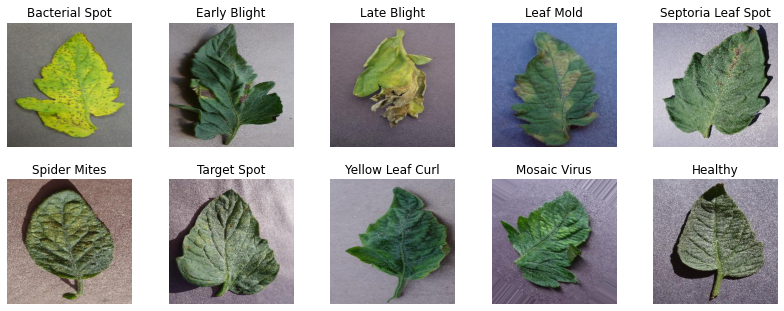

In [ ]:
filenames = []
short_classes=['Bacterial Spot','Early Blight','Late Blight','Leaf Mold','Septoria Leaf Spot',
            'Spider Mites','Target Spot','Yellow Leaf Curl','Mosaic Virus','Healthy']

for nameclass in classes:
  path = '/content/Tomato Leaf Diseases/Training Set/' + nameclass + '/'
  random_image = random.choice([x for x in os.listdir(path)
                                  if os.path.isfile(os.path.join(path, x))])
  filepath = os.path.join(path, random_image)
  filenames.append(filepath)

plt.figure()
fig = plt.figure(figsize=(11,11))

for i in range(len(filenames)):
  plt.subplot(5,5,i+1)
  img=mpimg.imread(filenames[i])
  plt.imshow(img)
  plt.tight_layout()
  plt.axis('off')
  plt.title(short_classes[i]) 

plt.show()

# Build The Model Using MobileNetV2

# Fine Tune MobileNetV2

In [ ]:
from keras.applications import mobilenet_v2
from keras.applications.mobilenet_v2 import MobileNetV2

In [ ]:
base_model = MobileNetV2(weights='imagenet',
                         include_top=False,
                         input_shape=(224, 224, 3))

base_model.trainable = False

x = base_model.layers[-1].output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

for layer in base_model.layers[-20:]:
  layer.trainable = True

model = Model(inputs = base_model.input, outputs=predictions)

model.summary()

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_15[0][0]                   
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

In [ ]:
from tensorflow import keras

model.compile(optimizer=keras.optimizers.SGD(learning_rate=1e-4,
                                             momentum=0.9),
                                             loss='categorical_crossentropy',
                                             metrics=['accuracy'])

In [ ]:
file_path="model.hdf5"

checkpoint = ModelCheckpoint(file_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early = EarlyStopping(monitor="val_loss", mode="min", patience=10)

callbacks_list = [checkpoint, early]

history = model.fit(
          train_generator,
          steps_per_epoch=train_generator.samples//train_generator.batch_size,
          epochs=50,
          validation_data=validation_generator,
          validation_steps=validation_generator.samples//validation_generator.batch_size,
          callbacks=callbacks_list)

Epoch 1/50
312/312 [==============================] - 166s 365ms/step - loss: 2.3431 - accuracy: 0.2005 - val_loss: 1.5921 - val_accuracy: 0.4453

Epoch 00001: val_loss improved from inf to 1.59212, saving model to model.hdf5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/50
312/312 [==============================] - 111s 355ms/step - loss: 1.4376 - accuracy: 0.5333 - val_loss: 1.1277 - val_accuracy: 0.6260

Epoch 00002: val_loss improved from 1.59212 to 1.12773, saving model to model.hdf5
Epoch 3/50
312/312 [==============================] - 112s 357ms/step - loss: 1.0557 - accuracy: 0.6562 - val_loss: 0.8630 - val_accuracy: 0.7107

Epoch 00003: val_loss improved from 1.12773 to 0.86297, saving model to model.hdf5
Epoch 4/50
312/312 [==============================] - 111s 354ms/step - loss: 0.8630 - accuracy: 0.7188 - val_loss: 0.7052 - val_accuracy: 0.7688

Epoch 00004: val_loss improved from 0.86297 to 0.70516, saving model to model.hdf5
Epoch 5/50
312/312 [==============================] - 110s 353ms/step - loss: 0.7656 - accuracy: 0.7460 - val_loss: 0.6003 - val_accuracy: 0.8005

Epoch 00005: val_loss improved from 0.70516 to 0.60035, saving model to model.hdf5
Epoch 6/50
312/312 [==============================] - 110s 353ms/step - loss: 0.

# Graphic Accuracy and Loss

In [ ]:
import matplotlib.pyplot as plt

def plot_train_history(history1):
    # Summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

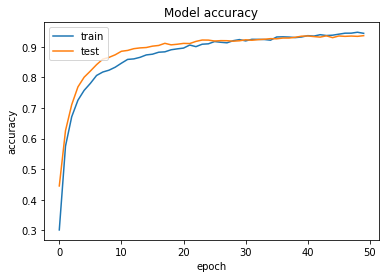

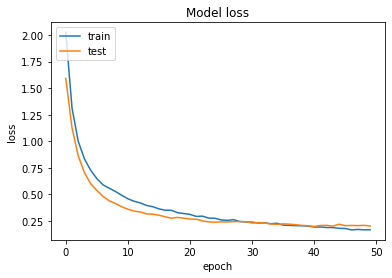

In [ ]:
plot_train_history(history)

# Confusion Matrix

In [ ]:
model_path = "/content/model.hdf5"

# Load the model
best_model = load_model(model_path, compile = True)

In [ ]:
def cf_predict():
  label = testing_generator.classes
  pred = best_model.predict(testing_generator)
  predicted_class_indices=np.argmax(pred,axis=1)

  labels = (testing_generator.class_indices)
  labels2 = dict((v,k) for k,v in labels.items())
  predictions = [labels2[k] for k in predicted_class_indices]

  cf_report = classification_report(predicted_class_indices,label)
  cm = confusion_matrix(predicted_class_indices,label)

  print('Confusion Matrix')
  plt.figure(figsize=(15,15))
  ax = sns.heatmap(cm, cmap=plt.cm.plasma, annot=True, square=True, xticklabels=classes, yticklabels=classes)
  ax.set_ylabel('Actual', fontsize=30)
  ax.set_xlabel('Predicted', fontsize=30)
  
  print()
  print('Classification Report')
  print(cf_report)

Confusion Matrix

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       312
           1       0.87      0.95      0.91       276
           2       0.93      0.96      0.95       292
           3       0.98      0.95      0.97       311
           4       0.89      0.95      0.92       280
           5       0.83      0.95      0.88       262
           6       0.96      0.75      0.84       385
           7       0.96      1.00      0.98       287
           8       0.99      1.00      0.99       296
           9       0.97      0.97      0.97       299

    accuracy                           0.93      3000
   macro avg       0.93      0.94      0.93      3000
weighted avg       0.94      0.93      0.93      3000



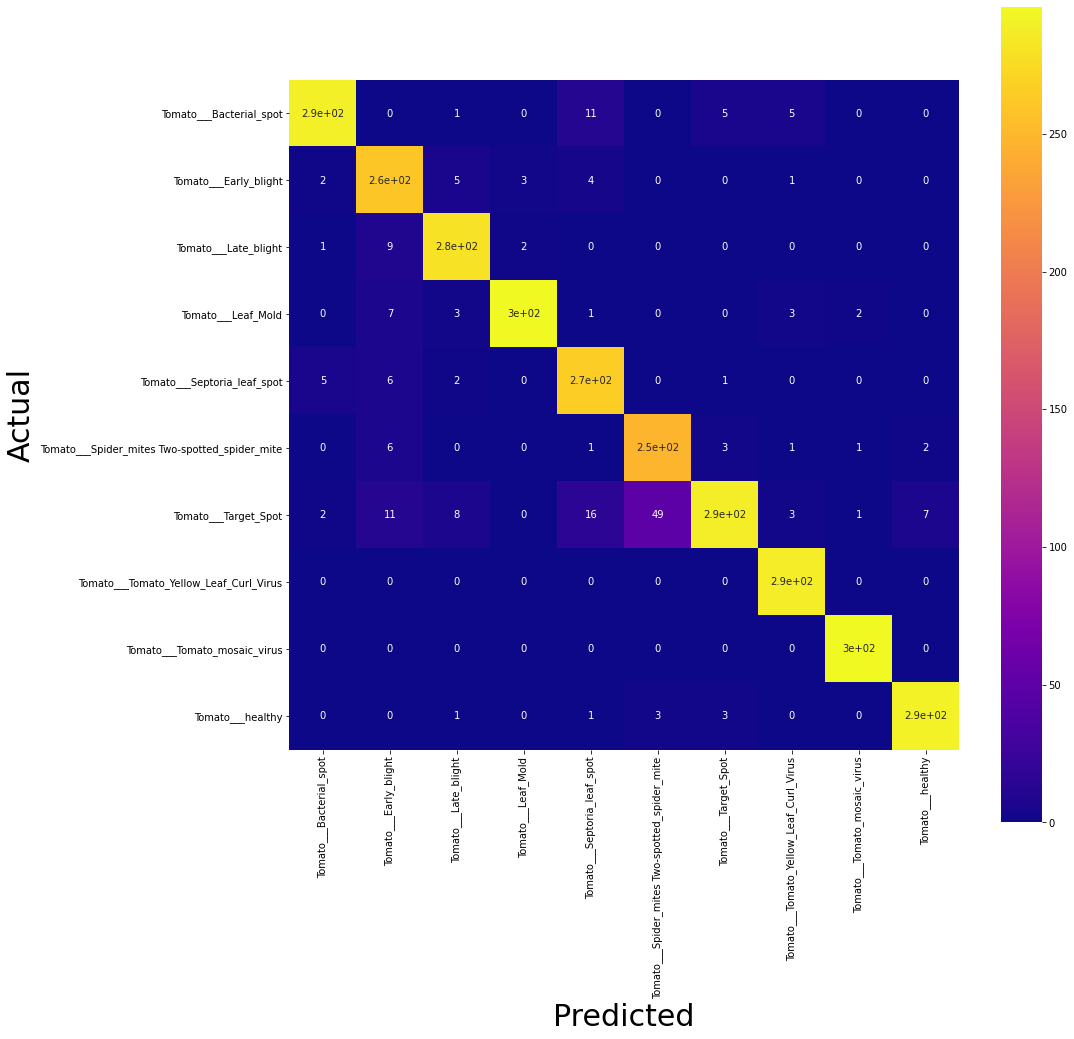

In [ ]:
cf_predict()

# Predict Image

Saving image (1001).JPG to image (1001).JPG


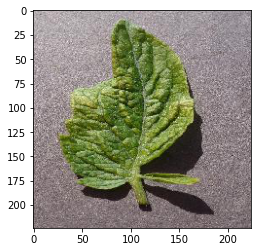

[2.5639668e-04 7.0043765e-03 1.9345211e-03 3.2638463e-03 8.6857611e-03
 1.0308433e-01 2.3033179e-02 1.4142007e-02 6.7726504e-03 8.3182293e-01]
Tomato___Bacterial_spot: 0.03%
Tomato___Early_blight: 0.70%
Tomato___Late_blight: 0.19%
Tomato___Leaf_Mold: 0.33%
Tomato___Septoria_leaf_spot: 0.87%
Tomato___Spider_mites Two-spotted_spider_mite: 10.31%
Tomato___Target_Spot: 2.30%
Tomato___Tomato_Yellow_Leaf_Curl_Virus: 1.41%
Tomato___Tomato_mosaic_virus: 0.68%
Tomato___healthy: 83.18%


In [ ]:
labels = list(train_generator.class_indices.keys())

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  images = np.vstack([x])
  proba = best_model.predict(images)[0]
  plt.imshow(img)
  plt.show()
  print(proba)
  for i in range(len(labels)):
    print("{}: {:.2f}%".format(labels[i], proba[i]* 100))

# Convert Model to TFLite

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(best_model)
converter.experimental_new_converter = True
tflite_model = converter.convert()
open("Mobilenet_20_SGD_tomatTreat.tflite", "wb").write(tflite_model)

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /tmp/tmp2lhyy0m0/assets


10182336

# Save Label

In [ ]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)

{'Tomato___Bacterial_spot': 0, 'Tomato___Early_blight': 1, 'Tomato___Late_blight': 2, 'Tomato___Leaf_Mold': 3, 'Tomato___Septoria_leaf_spot': 4, 'Tomato___Spider_mites Two-spotted_spider_mite': 5, 'Tomato___Target_Spot': 6, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato___Tomato_mosaic_virus': 8, 'Tomato___healthy': 9}
